In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv('startUp(1).csv')
data.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
dx = data.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for i in dx.columns:
    if dx[i].dtypes != 'O':
        dx[i] = scaler.fit_transform(dx[[i]])

dx.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,-1.697749,2.016411,0.560753,2.153943,New York,2.011203
1,-1.628453,1.955860,1.082807,1.923600,California,1.999430
2,-1.559158,1.754364,-0.728257,1.626528,Florida,1.980842
3,-1.489862,1.554784,-0.096365,1.422210,New York,1.776627
4,-1.420566,1.504937,-1.079919,1.281528,Florida,1.357740


In [4]:
#ENCODING THE NORMINAL DATA( transforming from categorical to numerical)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in dx.columns:
    if dx[i].dtypes == 'O':
        dx[i] = encoder.fit_transform(dx[i])
dx.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,-1.697749,2.016411,0.560753,2.153943,2,2.011203
1,-1.628453,1.955860,1.082807,1.923600,0,1.999430
2,-1.559158,1.754364,-0.728257,1.626528,1,1.980842
3,-1.489862,1.554784,-0.096365,1.422210,2,1.776627
4,-1.420566,1.504937,-1.079919,1.281528,1,1.357740


In [5]:
# drop state since it doesnt satisfy the assumption of linearity
dx.drop(['Unnamed: 0', 'State'], axis = 1, inplace=True)
dx.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

<Axes: >

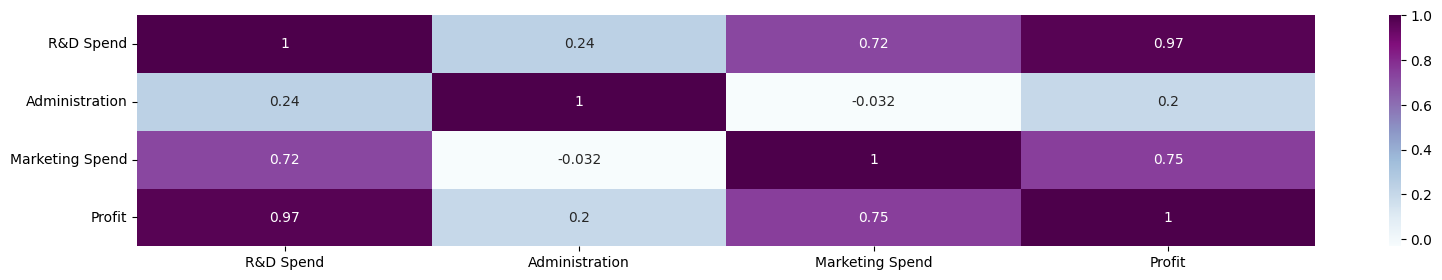

In [6]:
# assumption of multicolinearity
plt.figure(figsize = (19,3))
sns.heatmap(dx.corr(), annot=True, cmap='BuPu')

In [7]:
#Test and train split
x = dx.drop('Profit', axis = 1)
y = dx.Profit

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.80, random_state = 210806077)
print(f'xtrain: {xtrain.shape}')
print(f'ytrain: {ytrain.shape}')
print(f'xtest: {xtest.shape}')
print(f'ytest: {ytest.shape}')


xtrain: (40, 3)
ytrain: (40,)
xtest: (10, 3)
ytest: (10,)


In [8]:
train_set = pd.concat([xtrain, ytrain], axis = 1)
test_set = pd.concat([xtest, ytest], axis = 1)

print(f"\t\tTrain DataSet")
display(train_set.head())
print(f"\n\tTest DataSet")
display(test_set.head())

		Train DataSet


,R&D Spend,Administration,Marketing Spend,Profit
34,-0.600682,1.310535,-0.001879,-0.383444
24,0.073115,-0.795469,-0.581939,-0.086729
8,1.030369,0.986952,0.830887,1.007470
41,-1.008534,-1.320796,-0.384552,-0.857466
2,1.754364,-0.728257,1.626528,1.980842



	Test DataSet


,R&D Spend,Administration,Marketing Spend,Profit
48,-1.610433,-2.509409,-1.743127,-1.913212
1,1.955860,1.082807,1.923600,1.999430
42,-1.102106,-0.906938,-0.520596,-1.015365
29,-0.178609,1.142457,-0.858134,-0.275882
44,-1.134305,1.206419,-1.509074,-1.173209


In [9]:
# ------------MODELLING---------------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

Lin_reg = LinearRegression()

# Create a linear regression model
Lin_reg.fit(xtrain, ytrain)

#---------- cross validation (to see how well the model will predict after being trained) -----------
cross_validate = Lin_reg.predict(xtrain) # ----- this code predicts the y
score = r2_score(cross_validate, ytrain) # ----- this give the accuracy percentage, if it perfomrs well, it's underfitting and if it doesn't it's overfitting.
print(f"The Cross Validation Score is: {score.round(2)}")

The Cross Validation Score is: 0.94


In [10]:
test_prediction = Lin_reg.predict(xtest)
score = r2_score(test_prediction, ytest)
print(f"The Cross Validation Score is: {score.round(2)}")

The Cross Validation Score is: 0.97


In [11]:
# COMPARING THE ACTUAL RESULTS TO THE PREDICTED RESULTS
pd.DataFrame({'Actual': [i for i in ytest], 'Prediction': [i for i in test_prediction]})

,Actual,Prediction
0,-1.913212,-1.482783
1,1.999430,1.878780
2,-1.015365,-1.009847
3,-0.275882,-0.262382
4,-1.173209,-1.188096
5,1.127250,1.293715
6,1.096210,1.171889
7,0.375436,0.114794
8,0.808168,0.615828
9,-0.364127,-0.362045


In [12]:
print(f"Intercept of the model: {Lin_reg.intercept_}\n")
print(f"Coefficient of the model: {Lin_reg.coef_}\n")

Intercept of the model: 0.0021031320535358188

Coefficient of the model: [ 0.92613034 -0.04302738  0.05816476]



Y = b0 + b1 + b2 + b3 + b4 <br><br>

Profit =  0.002 + 0.92613034(R&D Spend) -0.04302738(Administration) + 0.05816476(Marketing Spend)<br>
<ul>
<li>A 1% change in the R&D Spending will make Profit change by 0.92 dollars</li>
<li>1% change in the Administration will make Profit change by 0.04 dollars</li>
<li>1% change in the Marketing Spend will make Profit change by 0.05 dollars</li>
<li>The value of Profit when all variables is zero is -0.02857154571257268</li>
</ul>

In [17]:
import pickle
lin_reg = LinearRegression()


# save model
pickle.dump(lin_reg, open('StartUp_Model.pkl', "wb"))